In [2]:
!pip install tbats

  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.


Libraries and data

#Import libraries
import pandas as pd
import numpy as np

In [7]:
#Get the data
data = pd.read_csv (r"C:\Users\Alvaro\Desktop\Data Sc/Forecasting Models and Time Series for Business in Python/Daily Bike Sharing.csv",
                    index_col = "dteday",
                    parse_dates = True)
data.head(1)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [8]:
#Select variables
dataset = data.loc[:,["cnt", "holiday", "workingday", "weathersit", "temp", "atemp",
                   "hum", "windspeed"]]
dataset.head(1)

,cnt,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


Data transformation

In [11]:
#Renaming variable
dataset = dataset.rename(columns = {"cnt" : "y"})
dataset.head(1)
#index
dataset.index
dataset = dataset.asfreq("D")
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq='D')

<AxesSubplot:xlabel='dteday'>

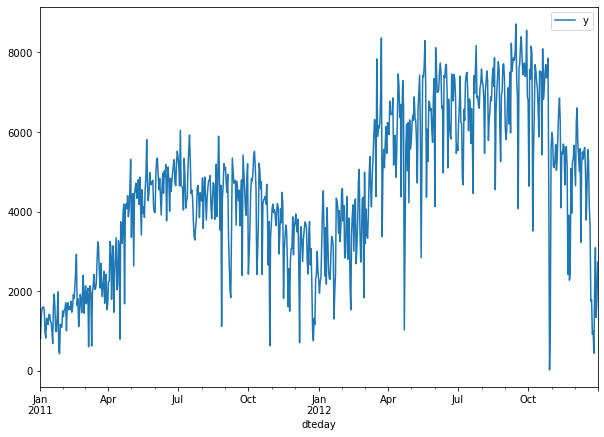

In [12]:
#viz
dataset["y"].plot(figsize = (10, 7), legend = True)

Training and test set

In [13]:
#Training and test set ( test van a ser los últimos 31 días del dataset)
test_days = 31
training_set = dataset.iloc[:-test_days, :] #todo menos los últimos 31 días
test_set = dataset.iloc[-test_days:, :]

TBATS model

In [15]:
#libraries
from tbats import TBATS

In [16]:
#tbats model
model = TBATS (use_trend = True, seasonal_periods = [7, 365.5])
model = model.fit(training_set["y"])

In [17]:
#predictions
predictions_tbats = pd.Series(model.forecast(steps = len(test_set))).rename("TBATS")
predictions_tbats.index = test_set.index
predictions_tbats.head()

dteday
2012-12-01    4828.272249
2012-12-02    4482.064414
2012-12-03    4362.513961
2012-12-04    4305.123489
2012-12-05    4260.338328
Freq: D, Name: TBATS, dtype: float64

<AxesSubplot:xlabel='dteday'>

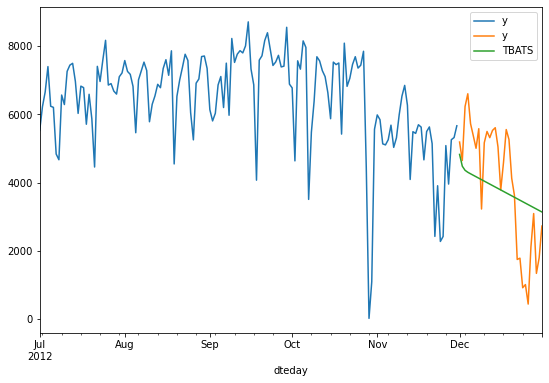

In [22]:
#visualization
training_set["y"]["2012-07-01":].plot(figsize = (9,6), legend = True)
test_set["y"].plot(legend = True)
predictions_tbats.plot(legend = True)

Model assessment

In [23]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print (round(mean_absolute_error(test_set["y"], predictions_tbats), 0))
print (round(np.sqrt(mean_squared_error(test_set["y"], predictions_tbats)), 0))

1299.0
1494.0


In [24]:
#MAPE function
def MAPE (y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean (np.abs((y_true - y_pred) / y_true)) * 100
MAPE (test_set["y"], predictions_tbats)

68.06406403722943

Export forecast